<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cuaderno 02
# **Curso Modelamiento Predictivo**
---
* Tema Principal: **Introducción a Modelos de Clasificación y Predicción**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020


## Librerías externas necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de base de datos

* Recuerde activar el ícono Google Drive Mount

In [ ]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/'
import os
os.listdir(ruta)

['uc__pnp__ejemplo_100.xlsx', 'modpred__01.ipynb', 'modpred__02.ipynb']

In [ ]:
data = pd.read_excel(ruta + 'uc__pnp__ejemplo_100.xlsx')
data.head()

,hora,sexo,edad,canal,tipo
0,0,Masculino,24,teléfono,robo
1,23,Femenino,59,efectivo,robo
2,9,Femenino,71,personal,violencia
3,24,Masculino,23,formulario web,infracción
4,13,Masculino,40,personal,infracción


## Intuición gráfica acerca de la predicción

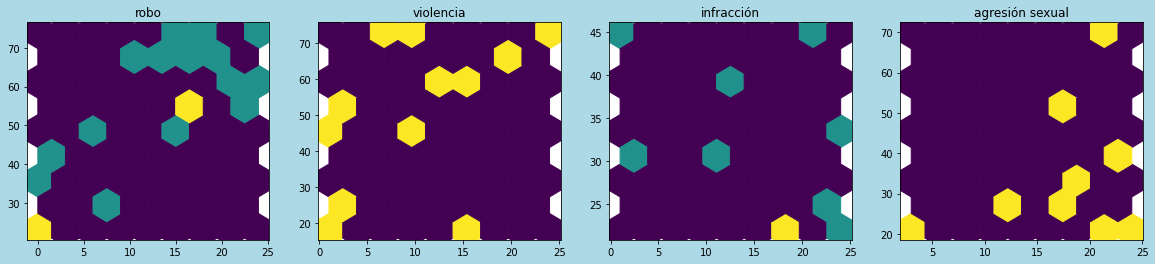

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), facecolor='lightblue')

for j, item in enumerate(data['tipo'].unique()):
  #print(j, item)
  datax = data[data['tipo'] == item]
  #print(datax)
  axs[j].hexbin(datax.hora, datax.edad, gridsize=8)
  axs[j].set_title(item)

plt.show()

## Modelo por Arbol de Decisiones

In [ ]:
#@title Librerías Específicas de Modelamiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
data.tipo.unique()

array(['robo', 'violencia', 'infracción', 'agresión sexual'], dtype=object)

In [ ]:
fac_tipo = pd.factorize(data.tipo)
fac_canal = pd.factorize(data.canal)
fac_sexo = pd.factorize(data.sexo)
data['fac_tipo'] = fac_tipo[0]
data['fac_canal'] = fac_canal[0]
data['fac_sexo'] = fac_sexo[0]
data.head()

,hora,sexo,edad,canal,tipo,fac_tipo,fac_canal,fac_sexo
0,0,Masculino,24,teléfono,robo,0,0,0
1,23,Femenino,59,efectivo,robo,0,1,1
2,9,Femenino,71,personal,violencia,1,2,1
3,24,Masculino,23,formulario web,infracción,2,3,0
4,13,Masculino,40,personal,infracción,2,2,0


In [ ]:
data200 = data.drop(['sexo', 'canal', 'tipo'], axis=1)
data200.head()

,hora,edad,fac_tipo,fac_canal,fac_sexo
0,0,24,0,0,0
1,23,59,0,1,1
2,9,71,1,2,1
3,24,23,2,3,0
4,13,40,2,2,0


In [ ]:
modelo = DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
X = data200.drop(['fac_tipo'], axis=1)
y = data200.fac_tipo

In [ ]:
modelo.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = modelo.predict(X)

In [ ]:
y_pred_cat = []
for it in y_pred:
  y_pred_cat.append(fac_tipo[1][it])
y_pred_cat[0:5]

['robo', 'robo', 'violencia', 'infracción', 'infracción']

In [ ]:
data['tipo_pred'] = y_pred_cat
data

In [ ]:
data['tipo'].unique()

array(['robo', 'violencia', 'infracción', 'agresión sexual'], dtype=object)

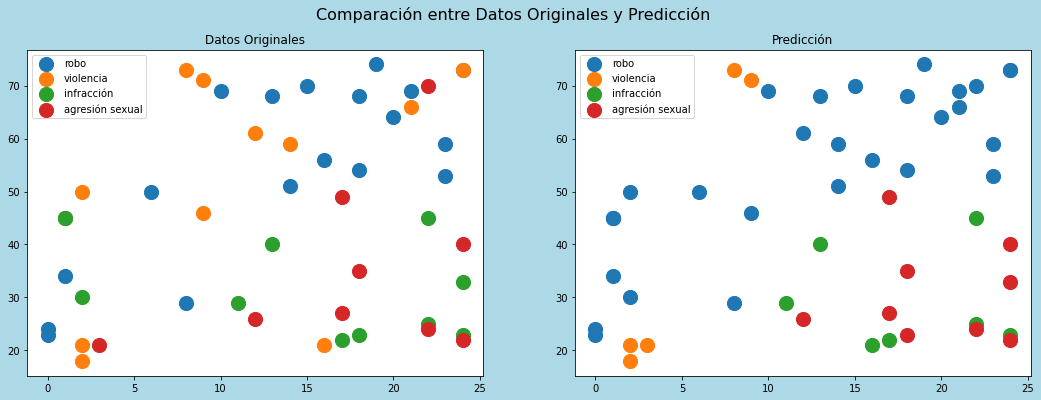

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='lightblue')

for item in data['tipo'].unique():
  datax = data[data['tipo'] == item]
  ax1.scatter(datax.hora, datax.edad, s=200, label=item)
  ax1.set_title('Datos Originales')
  ax1.legend()

for item in data['tipo_pred'].unique():
  datax = data[data['tipo_pred'] == item]
  ax2.scatter(datax.hora, datax.edad, s=200, label=item)
  ax2.set_title('Predicción')
  ax2.legend()

plt.suptitle('Comparación entre Datos Originales y Predicción', fontsize=16)
plt.show()

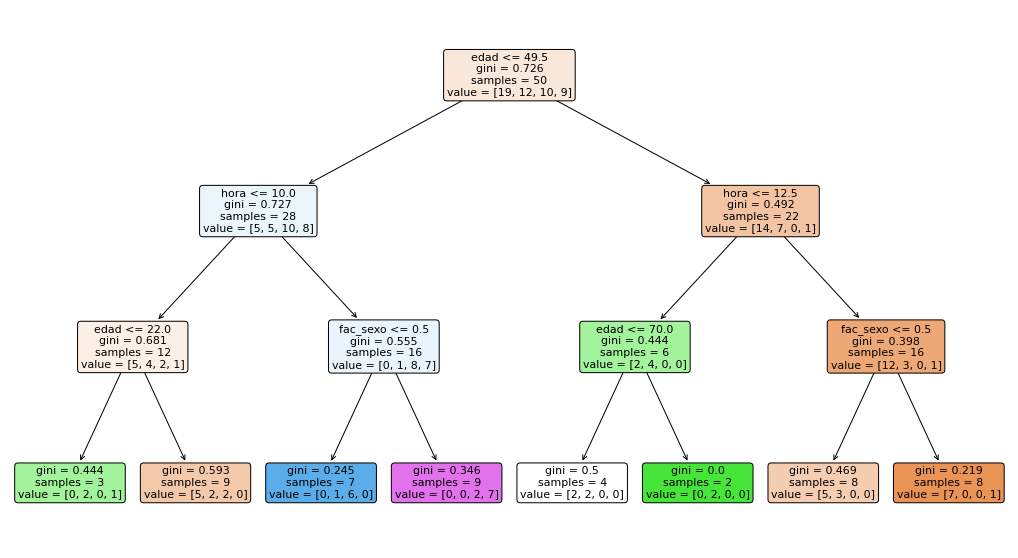

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(modelo, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.show()

In [ ]:
fac_sexo[1]

Index(['Masculino', 'Femenino'], dtype='object')

In [ ]:
X.head()

,hora,edad,fac_canal,fac_sexo
0,0,24,0,0
1,23,59,1,1
2,9,71,2,1
3,24,23,3,0
4,13,40,2,0


## Ejemplo
* Digamos que llega una declaración de un adulto masculino de 40 años a las 5 de la mañana registrado por un efectivo en la calle.
* También una mujer de 65 años declara de manera personal en una comisaría hacia las 4pm.


In [ ]:
fac_canal[1], fac_sexo[1], fac_tipo[1]

(Index(['teléfono', 'efectivo', 'personal', 'formulario web'], dtype='object'),
 Index(['Masculino', 'Femenino'], dtype='object'),
 Index(['robo', 'violencia', 'infracción', 'agresión sexual'], dtype='object'))

In [ ]:
X_ts = [[5, 40, 1, 0], [16, 65, 2, 1]]
y_ts = modelo.predict(np.array(X_ts))

In [ ]:
fac_tipo[1][y_ts]

Index(['robo', 'robo'], dtype='object')